<a href="https://colab.research.google.com/github/tirthbha/23-Homework6G2/blob/task1_tirthbha_version/task1_tirthbha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import scipy.integrate
from calculus_trithbha_version import simpson, trapezoid, adaptive_trapezoid

# Function to calculate exp(-1/x) with handling for x near 0
def exp(x):
    safe_x = np.clip(x, 1e-10, np.inf)  # Clip x to avoid division by zero or negative values
    return np.where(x != 0, np.exp(-1/safe_x), 0)  # Use np.where to handle x=0 separately

# Function to calculate cos(1/x) with handling for x near 0
def cos(x):
    safe_x = np.clip(x, 1e-10, np.inf)  # Clip x to avoid division by zero or negative values
    return np.where(x != 0, np.cos(1/safe_x), 1)  # Use np.where to handle x=0 separately

# Cubic function for testing: x^3 + constant
def cubic(x, constant=1/2):
    return x**3 + constant

# Function to calculate the number of correct digits in the numerical result
def correct_digits(actual, reference):
    error = np.abs(actual - reference)
    if reference != 0:
        relative_error = error / np.abs(reference)
        if relative_error == 0:
            return np.inf  # Handle the case when the relative error is exactly zero
        return -np.log10(relative_error)  # Calculate the number of correct digits
    else:
        if error == 0:
            return np.inf  # Handle the case when both actual and reference are zero
        return -np.log10(error)  # Calculate the number of correct digits

# Parameters for numerical integration
group_number = 2
epsilon = 1e-10  # Avoiding division by zero
n = 1000  # Initial number of subintervals
accuracy = 1e-3  # Desired accuracy

# Function definitions and integration methods as previously defined

# Main script
for func, interval in zip([exp, cos, lambda x: cubic(x, 1/group_number)],
                          [(0, 10 * group_number), (0, np.pi * group_number), (-1, 1)]):
    a, b = interval
    reference_value, _ = scipy.integrate.quad(func, a, b, limit=10000)  # Calculate the reference value

    # Calculate the integral using Simpson's rule
    simpson_integral, simpson_iterations = simpson(func, a, b, n, accuracy)
    simpson_error = np.abs(simpson_integral - reference_value)
    simpson_digits = correct_digits(simpson_integral, reference_value)

    # Calculate the integral using the Trapezoidal rule
    trapezoid_integral, trapezoid_iterations = trapezoid(func, a, b, n, accuracy)
    trapezoid_error = np.abs(trapezoid_integral - reference_value)
    trapezoid_digits = correct_digits(trapezoid_integral, reference_value)

    # Calculate the integral using Adaptive Trapezoidal rule
    adaptive_integral, adaptive_iterations = adaptive_trapezoid(func, a, b, accuracy)
    adaptive_error = np.abs(adaptive_integral - reference_value)
    adaptive_digits = correct_digits(adaptive_integral, reference_value)

    # Print results
    print(f"Function: {func.__name__}, Interval: [{a}, {b}]")
    print(f"Reference Value: {reference_value}")
    print(f"Simpson's Rule: Integral = {simpson_integral}, Error = {simpson_error}, Correct Digits = {simpson_digits}, Iterations = {simpson_iterations}")
    print(f"Trapezoidal Rule: Integral = {trapezoid_integral}, Error = {trapezoid_error}, Correct Digits = {trapezoid_digits}, Iterations = {trapezoid_iterations}")
    print(f"Adaptive Trapezoidal Rule: Integral = {adaptive_integral}, Error = {adaptive_error}, Correct Digits = {adaptive_digits}, Iterations = {adaptive_iterations}")
    print("-" * 50)


Function: exp, Interval: [0, 20]
Reference Value: 16.556690001504325
Simpson's Rule: Integral = 16.556690001504215, Error = 1.1013412404281553e-13, Correct Digits = 14.177051615403231, Iterations = 1
Trapezoidal Rule: Integral = 16.556690021321582, Error = 1.981725716859728e-08, Correct Digits = 8.921929972109869, Iterations = 1
Adaptive Trapezoidal Rule: Integral = 16.55667363137392, Error = 1.6370130406784256e-05, Correct Digits = 6.004921378289149, Iterations = 7
--------------------------------------------------
Function: cos, Interval: [0, 6.283185307179586]
Reference Value: 4.7919104503882535
Simpson's Rule: Integral = 4.790196560788537, Error = 0.0017138895997161896, Correct Digits = 3.446525850120297, Iterations = 2
Trapezoidal Rule: Integral = 4.792684250780791, Error = 0.0007738003925377157, Correct Digits = 3.7918797478112203, Iterations = 5
Adaptive Trapezoidal Rule: Integral = 4.791581337032652, Error = 0.0003291133556011516, Correct Digits = 4.163163186946656, Iterations 

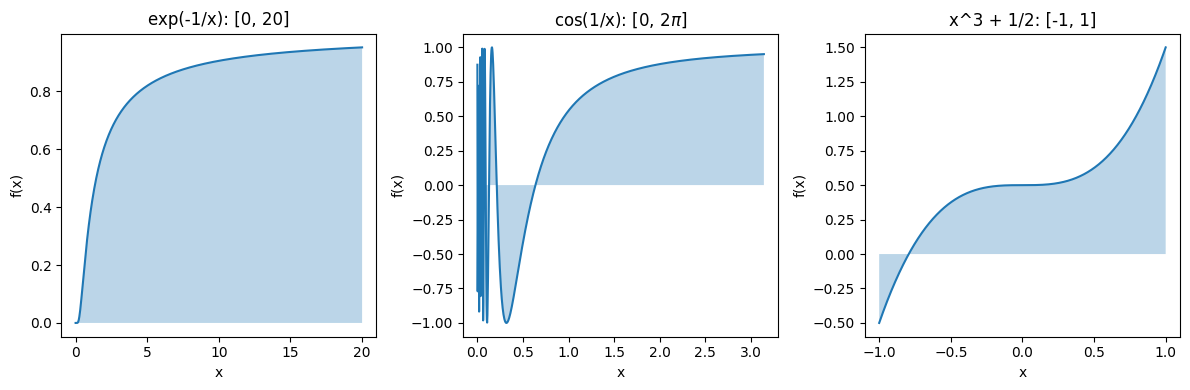

In [38]:
import matplotlib.pyplot as plt
# Titles for the plots
titles = [
    "exp(-1/x): [0, 20]",
    "cos(1/x): [0, $2\pi$]",
    "x^3 + 1/2: [-1, 1]"
]

# Create a figure with subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns, adjust figsize as needed

# Iterating over functions and intervals
for func, interval, title, ax in zip([exp, cos, cubic],
                                     [(0, 20), (1e-10, np.pi), (-1, 1)],
                                     titles, axs):
    a, b = interval
    x = np.linspace(a, b, 1000)
    y = func(x)
    ax.plot(x, y)
    ax.fill_between(x, y, alpha=0.3)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(title)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()